<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonFinalProject/blob/main/Final_Project_rev.2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Cleaning


In [ ]:
#Importing all necessary packages for data cleaning and analysis
import plotly.graph_objects as go
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl



**Import Data**

In [ ]:
url = "https://raw.githubusercontent.com/AndrewPiasecki/PythonFinalProject/main/IMBD_Data.csv"
df = pd.read_csv(url)

df

,ID,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,12/11/2001,James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,12/11/1970,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1/1/1970,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1/25/1970,Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,2/4/1970,Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,9/11/2020,Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,6/30/2021,Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,2/1/2021,Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,7/1/2021,Adam Robitel


In [ ]:
df.dtypes

ID                        object
primaryTitle              object
originalTitle             object
runtimeMinutes             int64
genres                    object
averageRating            float64
numVotes                   int64
budget                     int64
gross                    float64
releaseDate       datetime64[ns]
directors                 object
year                       int32
dtype: object

**Find the Columns with empty Values**

In [ ]:
emptyCols = [col for col in df.columns if df[col].isnull().any()]

if not emptyCols:
    print("No columns have empty data.")
else:
    print("Columns with empty data:")
    for col in emptyCols:
        print(f"\t- {col}")

Columns with empty data:
	- gross
	- releaseDate


**Remove Rows with Empty Column Values**

In [ ]:
df = df.dropna(subset=emptyCols)

df.head()

,ID,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,12/11/2001,James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,12/11/1970,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1/1/1970,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1/25/1970,Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,2/4/1970,Franklin J. Schaffner


**Test If Columns have been Removed**

In [ ]:
emptyCols = [col for col in df.columns if df[col].isnull().any()]

if not emptyCols:
    print("No columns have empty data.")
else:
    print("Columns with empty data:")
    for col in emptyCols:
        print(f"\t- {col}")

No columns have empty data.


**Remove Uneeded Column**

We are removing the column 'isAdult' as the data for this column is consistently one value and won't be of use for our analysis.


In [ ]:
df = df.drop('isAdult', axis = 1)

df.head()

,ID,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,12/11/2001,James Mangold
1,tt0065421,The Aristocats,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,12/11/1970,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1/1/1970,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1/25/1970,Robert Altman
4,tt0066206,Patton,Patton,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,2/4/1970,Franklin J. Schaffner


**Removing movies prior to 1970**

As we analyzed this data set, we noticed a large gap between 1905 and 1970. This gap would give us inaccurate analysis espically when doing time series. As a result, these movies where not included in the analysis.

In [ ]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['year'] = df['releaseDate'].dt.year
#setting our 'releaseDate' column to the proper date format and creating a year column that will display the year the movie was released

In [ ]:
df = df[df['releaseDate'].dt.year != 1905]
#Removing all rows with 1905 as the year

In [ ]:
df[df['releaseDate'].dt.year == 1905]
#Checking to make sure our dataframe does not have any dates from 1905

,ID,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors,year


# Data Analysis

**Gathering Release Date Data**



In [ ]:
dfReleaseDate = df.groupby('releaseDate').size().to_frame(name='Count').reset_index().sort_values(by=['Count'], ascending=False)[:20]
dfReleaseDate

,releaseDate,Count
1910,2012-09-08,5
1838,2011-12-11,4
2196,2015-09-03,4
2005,2013-08-30,4
1302,2006-09-01,4
1599,2009-09-11,4
1308,2006-09-09,4
1370,2007-06-12,4
2009,2013-09-07,4
1937,2013-01-18,4


In [ ]:
dfReleaseDate['releaseDate'] = pd.to_datetime(dfReleaseDate['releaseDate'])

In [ ]:
dfReleaseDate = dfReleaseDate.sort_values(by = 'releaseDate')
dfReleaseDate

,releaseDate,Count
226,1987-03-06,3
692,1999-02-19,3
1302,2006-09-01,4
1308,2006-09-09,4
1370,2007-06-12,4
1382,2007-08-17,3
1531,2009-01-18,3
1586,2009-08-13,3
1599,2009-09-11,4
1702,2010-09-01,3


**Gathering Genere Data**

In [ ]:
dfTopGenres = df.groupby('genres').size().to_frame(name='Count').reset_index().sort_values(by=['Count'], ascending=False)[:20]
dfTopGenres

,genres,Count
13,"Action,Adventure,Sci-Fi",127
147,"Comedy,Drama,Romance",121
68,"Adventure,Animation,Comedy",109
129,Comedy,99
4,"Action,Adventure,Comedy",98
34,"Action,Crime,Drama",89
175,"Comedy,Romance",83
40,"Action,Crime,Thriller",81
8,"Action,Adventure,Fantasy",80
212,Drama,74


**Gathering data on directors**

In [ ]:
# Calculate average rating per director
avgDirector = df.groupby('directors')['averageRating'].mean().reset_index()
avgDirector = avgDirector.sort_values(by='averageRating', ascending=False)
avgDirector = avgDirector.set_index('averageRating').head(20)
avgDirector


,directors
averageRating,
8.70,"Kemp Powers, Joaquim Dos Santos, Justin K. Tho..."
8.60,Roberto Benigni
8.50,"Roger Allers, Rob Minkoff"
8.50,Isao Takahata
8.50,Tony Kaye
8.40,"Lee Unkrich, Adrian Molina"
8.40,Nadine Labaki
8.40,"Rodney Rothman, Bob Persichetti, Peter Ramsey"
8.30,Richard Marquand


In [ ]:
dfDirectors = df.groupby('directors').size().to_frame(name='Count').reset_index().sort_values(by=['Count'], ascending=False)[:20]
selected_columns = ['gross', 'averageRating', 'budget', 'directors']

# Merging dfDirectors with the original DataFrame to get the required columns
dfDirectors = pd.merge(dfDirectors, df[selected_columns], on='directors', how='left')
dfDirectors

,directors,Count,gross,averageRating,budget
0,Steven Spielberg,30,476512065.0,8.1,7000000
1,Steven Spielberg,30,306889114.0,7.6,20000000
2,Steven Spielberg,30,389925971.0,8.4,18000000
3,Steven Spielberg,30,792910554.0,7.9,10500000
4,Steven Spielberg,30,333107271.0,7.5,28000000
...,...,...,...,...,...
301,Shawn Levy,11,152263880.0,6.3,55000000
302,Shawn Levy,11,41296320.0,6.6,19800000
303,Shawn Levy,11,93492844.0,6.3,58000000
304,Shawn Levy,11,363204635.0,6.2,127000000


## Descriptive Statistics


**Mean of Average Ratings**

In [ ]:
meanAR = round(df['averageRating'].mean(), 2)
meanAR

6.74

**Mode of Average Ratings**

In [ ]:
modeAR = round(df['averageRating'].mode(), 2)
modeAR

0    6.5
Name: averageRating, dtype: float64

**Standard Deviation of Average Ratings**

In [ ]:
standardDeviationAR = round(df['averageRating'].std(), 2)
standardDeviationAR

0.88

**Max and Min of Movie Budgets**


In [ ]:
maxBudget = df['budget'].max()
minBudget = df['budget'].min()

print(maxBudget)
print(minBudget)


356000000
18


**Average Movie Runtime**

In [ ]:
average_runtime = df['runtimeMinutes'].mean()
average_runtime

112.7743541861189

## Data Visualization


**Histogram of Average Rating Statistics**

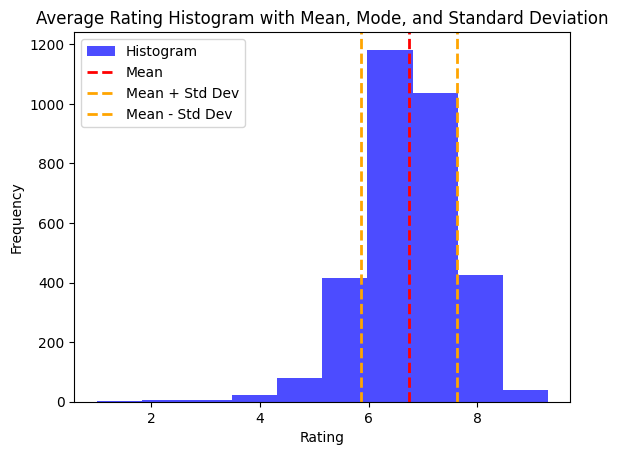

In [ ]:
plt.hist(df['averageRating'], bins = 10, color = 'blue', alpha = 0.7, label = 'Histogram')
plt.axvline(meanAR, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(meanAR + standardDeviationAR, color='orange', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.axvline(meanAR - standardDeviationAR, color='orange', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
## plt.axvline(modeAR, color='green', linestyle='dashed', linewidth=2, label='Mode')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Average Rating Histogram with Mean, Mode, and Standard Deviation')


plt.legend()


plt.show()

**Top Genre Bar Plot**

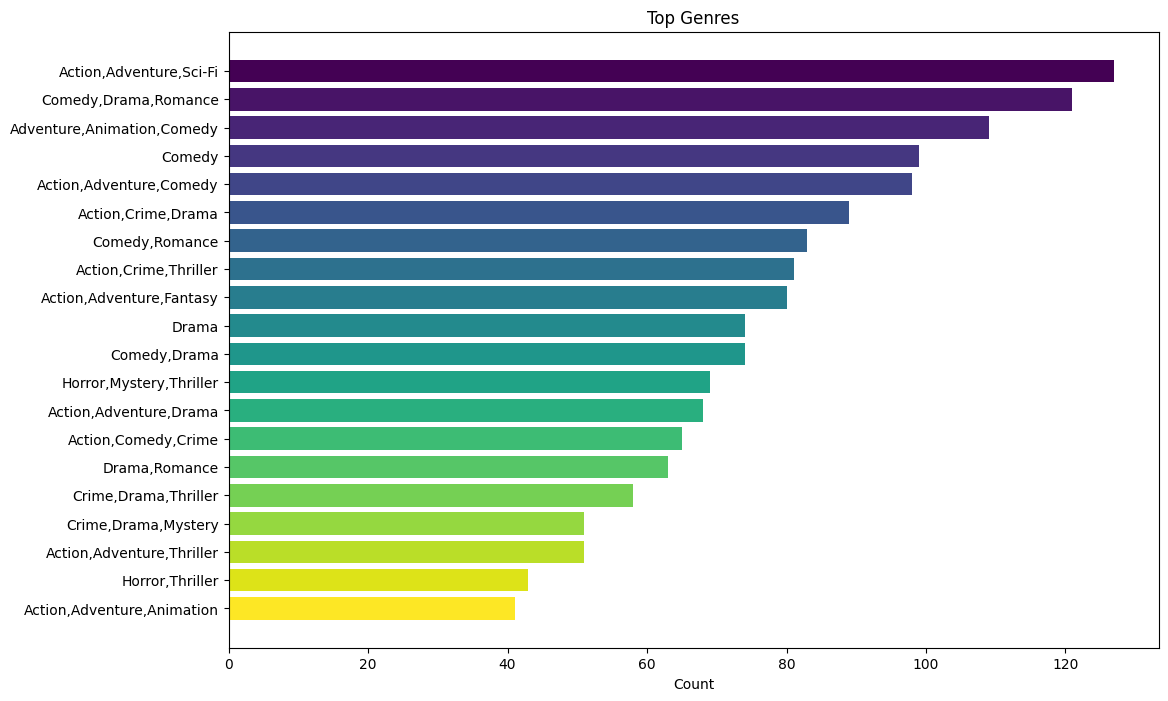

In [ ]:
# Plotting the top genres as horizontal bars
plt.figure(figsize=(12, 8))

# Generate a list of different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(dfTopGenres['genres'])))

# Plot each bar with a different color
plt.barh(dfTopGenres['genres'], dfTopGenres['Count'], color=colors)

plt.xlabel('Count')
plt.title('Top Genres')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

**Stacked Area Chart**

In [ ]:
# Get the top 20 most used genres
top_genres = df['genres'].value_counts().nlargest(20).index

# Filter the dataframe to include only the top genres
df_top = df[df['genres'].isin(top_genres)]

# Create a pivot table to prepare the data for the stacked area chart
stacked_data = df_top.groupby(['year', 'genres']).size().unstack().fillna(0).T

# Create a stacked area chart
fig = go.Figure()

for genre in stacked_data.index:
    fig.add_trace(go.Scatter(
        x=stacked_data.columns,
        y=stacked_data.loc[genre],
        mode='lines',
        stackgroup='one',
        name=genre
    ))

# Update layout for the plot
fig.update_layout(
    title='Top 20 Genre Usage Over the Years (Stacked Area Chart)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    showlegend=True
)

# Show the figure
fig.show()

**Pie Plot for Count of the Top Genres**

([<matplotlib.patches.Wedge at 0x7b806e34af50>,
 [Text(1.063477768789919, 0.2810961317585423, 'Action,Adventure,Sci-Fi'),
  Text(0.7950301499441716, 0.7602151410487351, 'Comedy,Drama,Romance'),
  Text(0.3666248792582644, 1.0371047188731055, 'Adventure,Animation,Comedy'),
  Text(-0.09165901078470448, 1.0961745416410515, 'Comedy'),
  Text(-0.5121099203694046, 0.973521149980442, 'Action,Adventure,Comedy'),
  Text(-0.8370276991382842, 0.7137118682460522, 'Action,Crime,Drama'),
  Text(-1.0309997728542897, 0.3834572575586533, 'Comedy,Romance'),
  Text(-1.09972449051708, 0.02461798035885241, 'Action,Crime,Thriller'),
  Text(-1.049163412544282, -0.33053915619550645, 'Action,Adventure,Fantasy'),
  Text(-0.8961909074871119, -0.6378415613123897, 'Drama'),
  Text(-0.666674306084095, -0.8749544957352301, 'Comedy,Drama'),
  Text(-0.3876496386995861, -1.0294307930191717, 'Horror,Mystery,Thriller'),
  Text(-0.08942847837745892, -1.096358767582534, 'Action,Adventure,Drama'),
  Text(0.20691082683354098,

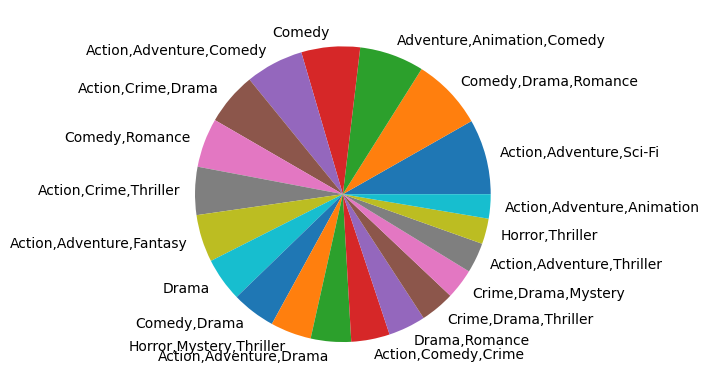

In [ ]:
plt.pie(dfTopGenres['Count'], labels = dfTopGenres['genres'])

**Release Count over Time (Y-Axis = 100s)**


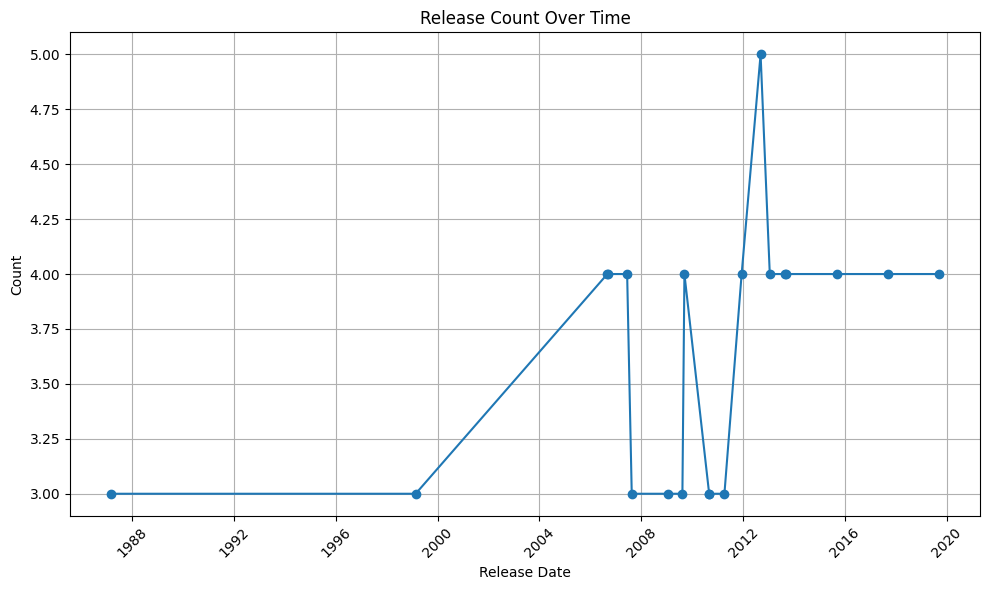

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dfReleaseDate['releaseDate'], dfReleaseDate['Count'], marker='o', linestyle='-')
plt.title('Release Count Over Time')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

**Scatter Plot of Votes Based on Rating**

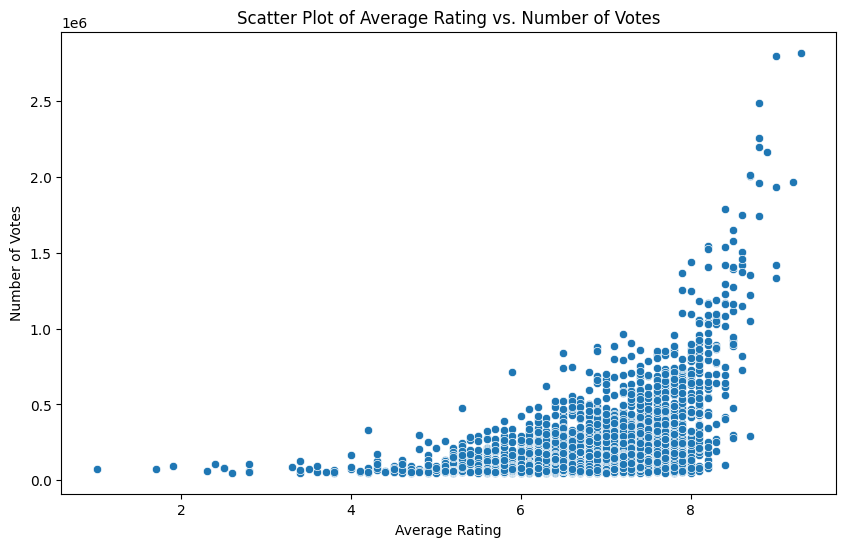

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='averageRating', y='numVotes', data=df)
plt.title('Scatter Plot of Average Rating vs. Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

**Gross Revenue Plot over 54 years**

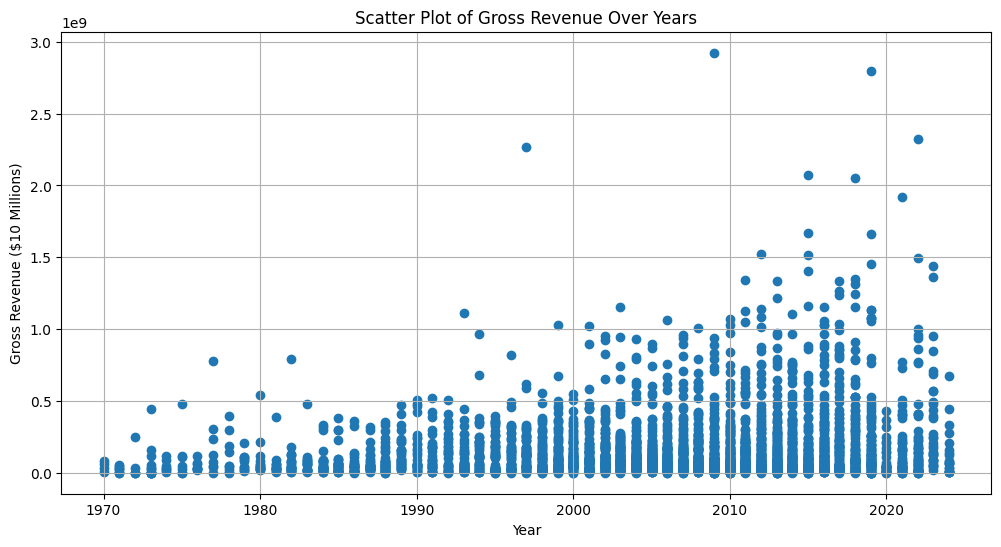

In [ ]:
plt.figure(figsize=(12, 6))  # Adjusted figsize for better visualization
plt.scatter(x=df['year'], y=df['gross'])  # Removed unnecessary data argument
plt.title('Scatter Plot of Gross Revenue Over Years')  # Adjusted title
plt.xlabel('Year')
plt.ylabel('Gross Revenue ($10 Millions)')
plt.grid(True)  # Adding grid for better readability
plt.show()

**Time Series of Gross Revenue**

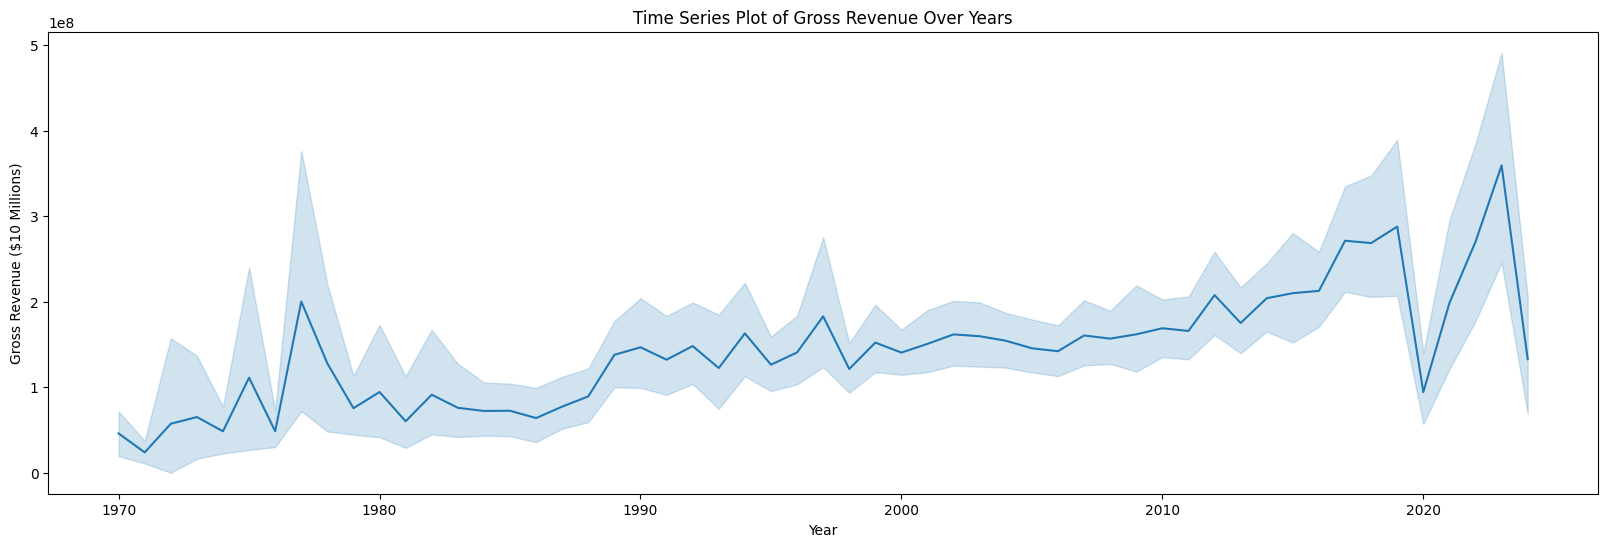

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df['year'], y=df['gross'], data=df)
plt.title('Time Series Plot of Gross Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Gross Revenue ($10 Millions)')
plt.show()

**Histogram of Runtime in Minutes**

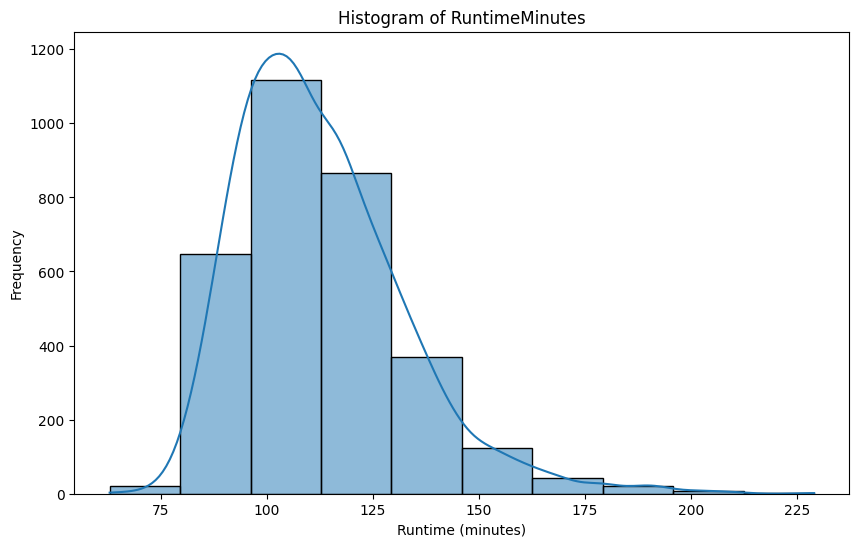

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtimeMinutes'], bins=10, kde=True)
plt.title('Histogram of RuntimeMinutes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

**3D Version of Above Histogram**

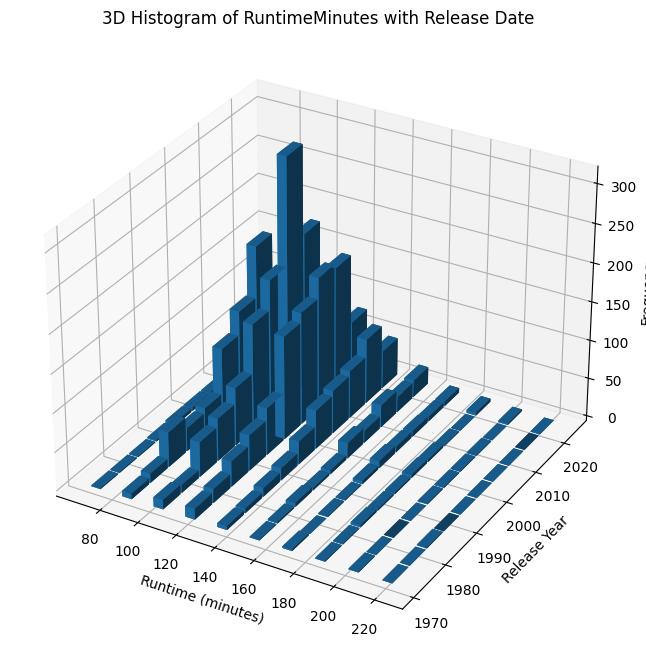

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection='3d')

# Plot the 3D histogram
hist, xedges, yedges = np.histogram2d(df['runtimeMinutes'], df['releaseDate'].dt.year, bins=(10, 10))
xpos, ypos = np.meshgrid(xedges[:-1] + 5, yedges[:-1] + 0.5, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 5 * np.ones_like(zpos)
dz = hist.ravel()

# Create 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')

# Set labels and title
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Release Year')
ax.set_zlabel('Frequency')
plt.title('3D Histogram of RuntimeMinutes with Release Date')

plt.show()

# Conclusions and Insights

## Release Dates

We wanted to find out what dates had the most amount of movies released. We decided to sort the dataframe by the relasese date and count the amount of times the date had occured.

September 8th 2009 had 5 movies released in a single day, making it the most movies released in a single day.

## Genres

The data contained a column of the movies genre. Since movies often have multiple genres, we decided it would be best to see which genre combnaition was the most used.


Using our analysis, we found that 127 of the movies were labled as 'Action, Adventure, Sci-Fi'. This means it is the most common movie genre combnation.

## Average Ratings

## Directors

We wanted to see which director produced the most popular movies and who has produced the most.

To find out which directors produced the most popular movie, we sorted the dataframe by the directors and average movie rating.

We found that


To find out which director prodcued the most amount of movies, we sorted the dataframe by the directors and counted the movies each director produced.

## Run Time

We wanted to explore

## Gross Revenue